In [1]:
# Course DSC 650 - Data Mining
# Name - Vikas Ranjan
# Assignment - Assignment 6.2a CIFAR10 small images classification dataset.

In [2]:
# Import packages
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import models
from keras import layers
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [6]:
# Preprocess the data (these are NumPy arrays)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [7]:
x_val.shape, y_val.shape

((10000, 32, 32, 3), (10000, 10))

In [8]:
#instantiate the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [9]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val),verbose=0)

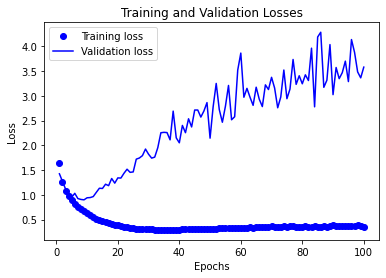

<Figure size 432x288 with 0 Axes>

In [10]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(history.history['loss']) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
plt.savefig('results/6_2a_lossplot.png')

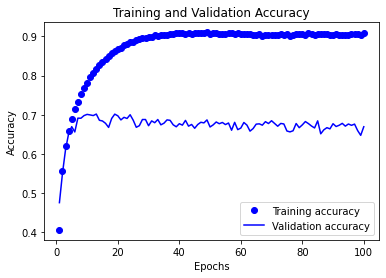

<Figure size 432x288 with 0 Axes>

In [11]:
train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(history.history['accuracy']) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
plt.savefig('results/6_2a_accplot.png')

In [12]:
#retrain the model and evaluate on test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)
results = model.evaluate(x_test, y_test)

Epoch 1/10
1563/1563 [==============================] - 17s 10ms/step - loss: 0.9287 - accuracy: 0.7639
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7448 - accuracy: 0.7836
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6829 - accuracy: 0.7947
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6692 - accuracy: 0.7935
Epoch 5/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.6515 - accuracy: 0.8005
Epoch 6/10
1563/1563 [==============================] - 16s 11ms/step - loss: 0.6412 - accuracy: 0.8008
Epoch 7/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6278 - accuracy: 0.8024
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6112 - accuracy: 0.8042
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6057 - accuracy: 0.8090
Epoch 10/10
313/313 [==============================] - 2s 5ms/st

In [13]:
model.save('results/6_2a_model.h5')

In [14]:
prediction_results = model.predict(x_test)

In [15]:
#write metrics to file
with open('results/6_2a_metrics.txt', 'w') as f:
    f.write('Training Loss: {}'.format(str(history.history['loss'])))
    f.write('\nTraining Accuracy: {}'.format(str(history.history['accuracy'])))
    f.write('\nTest Loss: {}'.format(results[0]))
    f.write('\nTest Accuracy: {}'.format(results[1]))

In [16]:
predictions = pd.DataFrame(prediction_results, columns=['0','1','2','3','4','5','6','7','8','9'])
predictions.to_csv('results/6_2a_predictions.csv', index=False)
